In [5]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pickle as pkl

from models.conv_nets import make_convNet 
from utils.train_utils import timer, inverse_squareroot_lr
from utils.visualizations import plot_loss_from_file_convnets

# keeps tensorflow from using all available GPU memory when a model is initialized.
gpus = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

In [28]:
batch_size=128
n_epochs = 500_000 // (50_000 // 128) # total number desirec SGD steps / number batches per epoch

label_noise_int = 10
label_noise = label_noise_int / 100


# load the Cifar 10 data set
cifar10 = tf.keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
image_shape = x_train[0].shape

# apply label noise to the data set
random_idx = np.random.choice(x_train.shape[0], int(label_noise*x_train.shape[0]))
rand_labels = np.random.randint(low=y_train.min(), high=y_train.max(), size=len(random_idx))
y_train[random_idx] = np.expand_dims(rand_labels, axis=1)

model_histories = {}
convnet_widths = [1 + i for i in range(16)] 
convnet_depth = 7

# Paths to save model weights and 
model_weights_paths = f'trained_model_weights/conv_nets_depth_{convnet_depth}_{label_noise_int}pct_noise/'
data_save_path = 'experimental_results/conv_nets_'

for width in convnet_widths:
    # Depth 7 Conv Net using default Kaiming Uniform Initialization.
    conv_net, model_id = make_convNet(image_shape, depth=convnet_depth, init_channels=width)

    conv_net.compile(
        optimizer=tf.keras.optimizers.SGD(learning_rate=inverse_squareroot_lr()),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    model_timer = timer()
    
    print(f'STARTING TRAINING: {model_id}')
    history = conv_net.fit(
        x=x_train, y=y_train, 
        validation_data=(x_test, y_test),
        epochs=n_epochs,
        batch_size=batch_size,
        verbose=0, 
        callbacks = [model_timer]
    )
    print(f'FINISHED TRAINING: {model_id}')    
    
    # add results to dictionary and store the resulting model weights.
    model_histories[model_id] = history
    history.model.save_weights(model_weights_paths+model_id)
    
    # clear GPU of prior model to decrease training times.
    tf.keras.backend.clear_session()
    
    
# store all the results in a pickle file for later graphing and analysis.
depth_7_metrics = {} 

for m_id, history in model_histories.items():
    depth_7_metrics[m_id] = history.history
    
pkl.dump(depth_7_metrics, open(data_save_path + f'depth_{convnet_depth}_{label_noise_int}pct_noise.pkl', 'wb'))

STARTING TRAINING: conv_net_depth_7_width_3
Epoch: 0000, Total Run Time: 00:00:09 - Loss: 2.0538e+00, Accuracy: 0.314, Test Loss: 1.7913e+00, Test Accuracy: 0.350
Epoch: 0025, Total Run Time: 00:02:51 - Loss: 7.6765e-01, Accuracy: 0.764, Test Loss: 1.0183e+00, Test Accuracy: 0.656
Epoch: 0050, Total Run Time: 00:05:30 - Loss: 4.7758e-01, Accuracy: 0.843, Test Loss: 1.6229e+00, Test Accuracy: 0.591
Epoch: 0075, Total Run Time: 00:08:10 - Loss: 2.9447e-01, Accuracy: 0.898, Test Loss: 2.1674e+00, Test Accuracy: 0.561
Epoch: 0100, Total Run Time: 00:10:48 - Loss: 1.9026e-01, Accuracy: 0.933, Test Loss: 2.3719e+00, Test Accuracy: 0.588
Epoch: 0125, Total Run Time: 00:13:29 - Loss: 1.3203e-01, Accuracy: 0.953, Test Loss: 2.9040e+00, Test Accuracy: 0.565
Epoch: 0150, Total Run Time: 00:16:12 - Loss: 1.1342e-01, Accuracy: 0.959, Test Loss: 3.1394e+00, Test Accuracy: 0.580
Epoch: 0175, Total Run Time: 00:18:51 - Loss: 5.8267e-02, Accuracy: 0.980, Test Loss: 3.3435e+00, Test Accuracy: 0.584
Epoc

Epoch: 0400, Total Run Time: 00:50:26 - Loss: 1.7524e-04, Accuracy: 1.000, Test Loss: 2.2023e+00, Test Accuracy: 0.662
Epoch: 0425, Total Run Time: 00:53:40 - Loss: 1.6453e-04, Accuracy: 1.000, Test Loss: 2.2129e+00, Test Accuracy: 0.662
Epoch: 0450, Total Run Time: 00:56:58 - Loss: 1.6363e-04, Accuracy: 1.000, Test Loss: 2.2305e+00, Test Accuracy: 0.662
Epoch: 0475, Total Run Time: 01:00:09 - Loss: 1.5080e-04, Accuracy: 1.000, Test Loss: 2.2405e+00, Test Accuracy: 0.662
Epoch: 0500, Total Run Time: 01:03:17 - Loss: 1.3339e-04, Accuracy: 1.000, Test Loss: 2.2507e+00, Test Accuracy: 0.662
Epoch: 0525, Total Run Time: 01:06:23 - Loss: 1.2181e-04, Accuracy: 1.000, Test Loss: 2.2602e+00, Test Accuracy: 0.662
Epoch: 0550, Total Run Time: 01:09:28 - Loss: 1.3195e-04, Accuracy: 1.000, Test Loss: 2.2730e+00, Test Accuracy: 0.662
Epoch: 0575, Total Run Time: 01:12:31 - Loss: 1.1327e-04, Accuracy: 1.000, Test Loss: 2.2856e+00, Test Accuracy: 0.663
Epoch: 0600, Total Run Time: 01:15:39 - Loss: 9.

Epoch: 0825, Total Run Time: 01:21:02 - Loss: 5.0764e-05, Accuracy: 1.000, Test Loss: 1.7877e+00, Test Accuracy: 0.699
Epoch: 0850, Total Run Time: 01:24:17 - Loss: 4.7493e-05, Accuracy: 1.000, Test Loss: 1.7919e+00, Test Accuracy: 0.699
Epoch: 0875, Total Run Time: 01:27:32 - Loss: 4.4944e-05, Accuracy: 1.000, Test Loss: 1.7968e+00, Test Accuracy: 0.700
Epoch: 0900, Total Run Time: 01:30:46 - Loss: 4.4752e-05, Accuracy: 1.000, Test Loss: 1.8010e+00, Test Accuracy: 0.700
Epoch: 0925, Total Run Time: 01:34:01 - Loss: 4.5411e-05, Accuracy: 1.000, Test Loss: 1.8048e+00, Test Accuracy: 0.699
Epoch: 0950, Total Run Time: 01:37:18 - Loss: 4.2035e-05, Accuracy: 1.000, Test Loss: 1.8079e+00, Test Accuracy: 0.700
Epoch: 0975, Total Run Time: 01:40:32 - Loss: 3.9760e-05, Accuracy: 1.000, Test Loss: 1.8133e+00, Test Accuracy: 0.699
Epoch: 1000, Total Run Time: 01:43:47 - Loss: 4.4652e-05, Accuracy: 1.000, Test Loss: 1.8175e+00, Test Accuracy: 0.700
Epoch: 1025, Total Run Time: 01:47:02 - Loss: 3.

Epoch: 1250, Total Run Time: 03:15:58 - Loss: 2.5142e-05, Accuracy: 1.000, Test Loss: 1.5332e+00, Test Accuracy: 0.730
Epoch: 1275, Total Run Time: 03:19:56 - Loss: 2.4116e-05, Accuracy: 1.000, Test Loss: 1.5360e+00, Test Accuracy: 0.729
FINISHED TRAINING: conv_net_depth_7_width_9
STARTING TRAINING: conv_net_depth_7_width_11
Epoch: 0000, Total Run Time: 00:00:13 - Loss: 2.8826e+00, Accuracy: 0.274, Test Loss: 2.2906e+00, Test Accuracy: 0.239
Epoch: 0025, Total Run Time: 00:04:29 - Loss: 5.2111e-03, Accuracy: 1.000, Test Loss: 9.5204e-01, Test Accuracy: 0.740
Epoch: 0050, Total Run Time: 00:08:47 - Loss: 1.0984e-03, Accuracy: 1.000, Test Loss: 1.0492e+00, Test Accuracy: 0.742
Epoch: 0075, Total Run Time: 00:13:03 - Loss: 5.9658e-04, Accuracy: 1.000, Test Loss: 1.0988e+00, Test Accuracy: 0.740
Epoch: 0100, Total Run Time: 00:17:19 - Loss: 4.0007e-04, Accuracy: 1.000, Test Loss: 1.1308e+00, Test Accuracy: 0.740
Epoch: 0125, Total Run Time: 00:21:34 - Loss: 3.0255e-04, Accuracy: 1.000, Tes

Epoch: 0350, Total Run Time: 00:51:08 - Loss: 7.7162e-05, Accuracy: 1.000, Test Loss: 1.1534e+00, Test Accuracy: 0.752
Epoch: 0375, Total Run Time: 00:54:15 - Loss: 7.3957e-05, Accuracy: 1.000, Test Loss: 1.1595e+00, Test Accuracy: 0.753
Epoch: 0400, Total Run Time: 00:57:22 - Loss: 6.9719e-05, Accuracy: 1.000, Test Loss: 1.1654e+00, Test Accuracy: 0.752
Epoch: 0425, Total Run Time: 01:00:29 - Loss: 6.4632e-05, Accuracy: 1.000, Test Loss: 1.1707e+00, Test Accuracy: 0.753
Epoch: 0450, Total Run Time: 01:03:35 - Loss: 6.5710e-05, Accuracy: 1.000, Test Loss: 1.1751e+00, Test Accuracy: 0.751
Epoch: 0475, Total Run Time: 01:06:44 - Loss: 5.9932e-05, Accuracy: 1.000, Test Loss: 1.1792e+00, Test Accuracy: 0.751
Epoch: 0500, Total Run Time: 01:11:56 - Loss: 5.3550e-05, Accuracy: 1.000, Test Loss: 1.1843e+00, Test Accuracy: 0.751
Epoch: 0525, Total Run Time: 01:18:23 - Loss: 5.2707e-05, Accuracy: 1.000, Test Loss: 1.1881e+00, Test Accuracy: 0.751
Epoch: 0550, Total Run Time: 01:23:08 - Loss: 4.

Epoch: 0775, Total Run Time: 02:34:39 - Loss: 3.2202e-05, Accuracy: 1.000, Test Loss: 1.1277e+00, Test Accuracy: 0.765
Epoch: 0800, Total Run Time: 02:37:45 - Loss: 2.8168e-05, Accuracy: 1.000, Test Loss: 1.1300e+00, Test Accuracy: 0.766
Epoch: 0825, Total Run Time: 02:40:51 - Loss: 2.7915e-05, Accuracy: 1.000, Test Loss: 1.1322e+00, Test Accuracy: 0.766
Epoch: 0850, Total Run Time: 02:43:57 - Loss: 2.7315e-05, Accuracy: 1.000, Test Loss: 1.1334e+00, Test Accuracy: 0.766
Epoch: 0875, Total Run Time: 02:47:03 - Loss: 2.7605e-05, Accuracy: 1.000, Test Loss: 1.1372e+00, Test Accuracy: 0.765
Epoch: 0900, Total Run Time: 02:50:09 - Loss: 2.5877e-05, Accuracy: 1.000, Test Loss: 1.1409e+00, Test Accuracy: 0.765
Epoch: 0925, Total Run Time: 02:53:16 - Loss: 2.5312e-05, Accuracy: 1.000, Test Loss: 1.1422e+00, Test Accuracy: 0.766
Epoch: 0950, Total Run Time: 02:56:22 - Loss: 2.2954e-05, Accuracy: 1.000, Test Loss: 1.1438e+00, Test Accuracy: 0.765
Epoch: 0975, Total Run Time: 02:59:04 - Loss: 2.

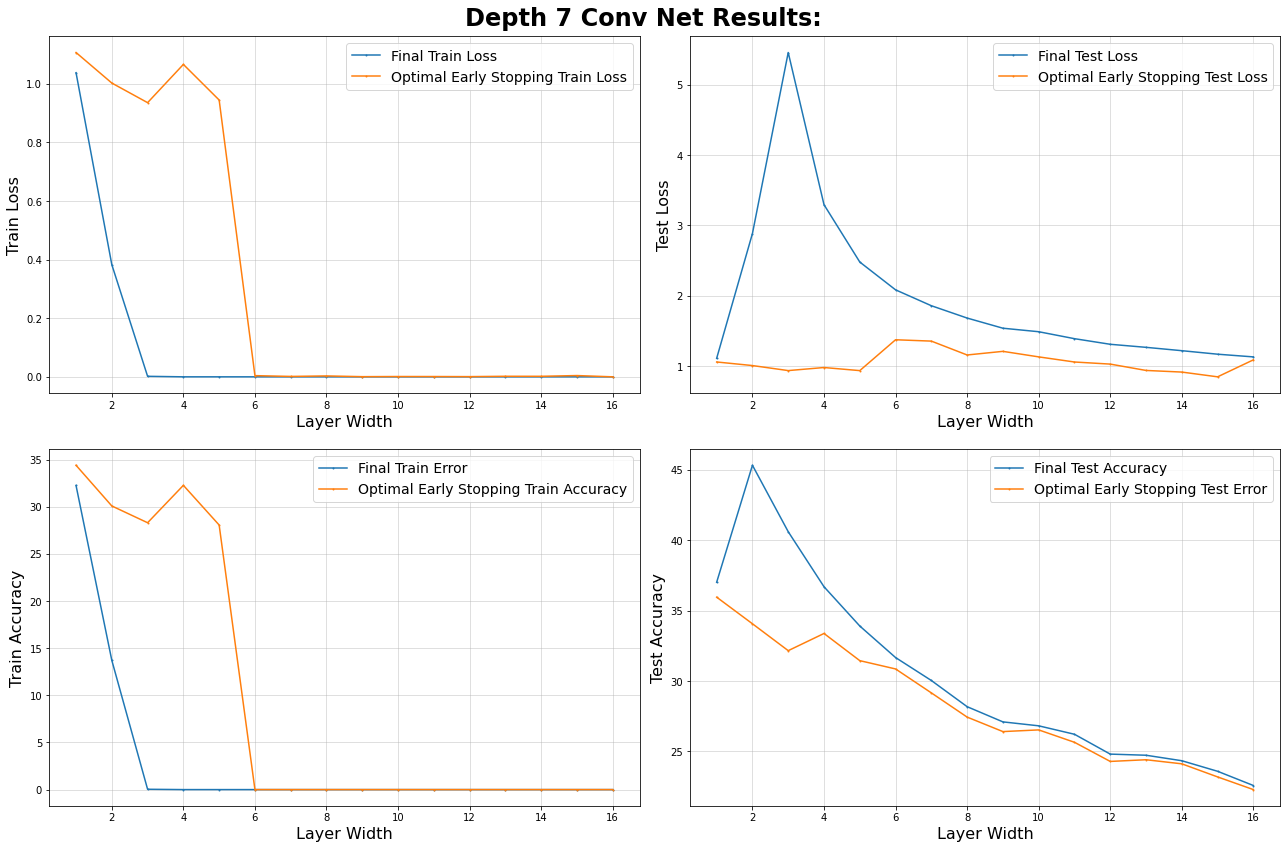

In [6]:
plot_path = f'experimental_results/conv_nets_depth_{convnet_depth}_10pct_noise.pkl'
plot_loss_from_file_convnets(plot_path, depth=convnet_depth)

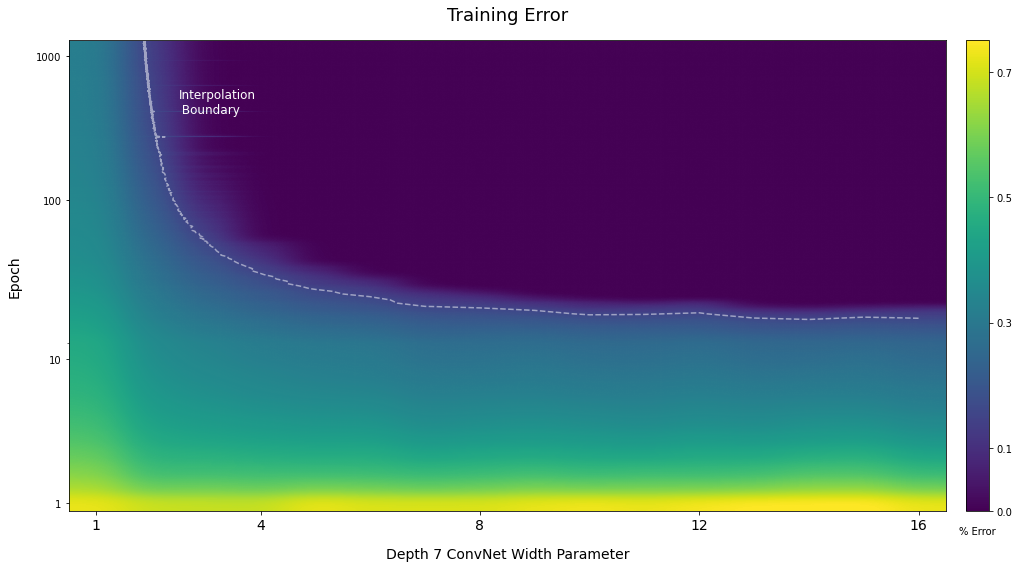

In [341]:
import matplotlib.colors as colors
import matplotlib as mpl
import matplotlib 

fig = plt.figure(figsize=(15, 8))
ax = fig.gca()

M = 1 - train_accuracy + 1e-15
norm = matplotlib.colors.Normalize(vmin=0.0, vmax=0.75)
im = ax.imshow(M.T, aspect='auto',  origin='lower', norm=norm, interpolation='gaussian') 

# set axis labels and title
ax.set_xlabel('Depth 7 ConvNet Width Parameter', fontsize=14, labelpad=15)
ax.set_ylabel('Epoch', fontsize=14, labelpad=15)
ax.set_title('Training Error', fontsize=18, pad=20)

# set x axis ticks (not that there is an offset of 1 since the array is 0 indexed)
x_idx = [0, 3, 7, 11, 15]
x_vals = x_idx
x_labs = ['%d' % (n+1) for n in x_idx]
ax.set_xticks(x_idx)
ax.set_xticklabels(x_labs, fontsize=14)

# set y ticks and adjust scale
ax.set_yscale('symlog', linthresh=10)
ax.set_yticks([i-1 for i in [1, 10, 100, 1000]])
ax.set_yticklabels([1, 10, 100, 1000])

# Colorbar
ticks = [0.0, 0.1, 0.3, 0.5, 0.7]
cbar = fig.colorbar(im, pad=0.02, ticks=ticks, fraction=0.1)
cbar.ax.get_xaxis().labelpad = 15
cbar.ax.set_xlabel('% Error')

# add interpolation point contour and label
ax.contour(M.T, levels=[0.155], colors='white', linestyles='dashed', linewidths=1.5, alpha=0.5)
ax.annotate('Interpolation\n Boundary', (0.175, 0.8), c='w', fontsize=12, xycoords='figure fraction')

plt.tight_layout()
plt.show()

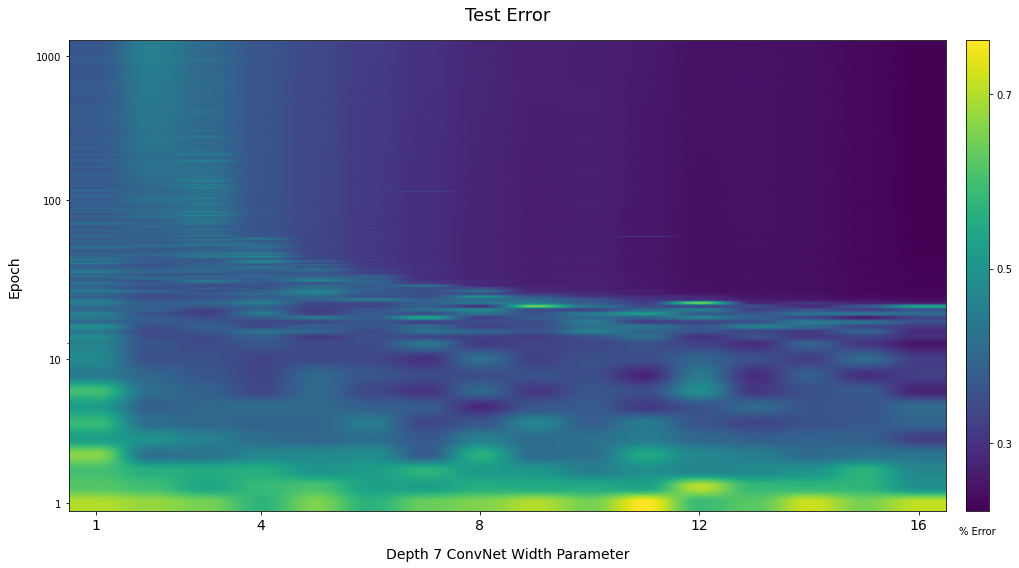

In [360]:
fig = plt.figure(figsize=(15, 8))
ax = fig.gca()

M = 1 - test_accuracy
norm = matplotlib.colors.Normalize(vmin=0.2, vmax=np.max(M))
im = ax.imshow(M.T, aspect='auto',  origin='lower', ) 

# set axis labels and title
ax.set_xlabel('Depth 7 ConvNet Width Parameter', fontsize=14, labelpad=15)
ax.set_ylabel('Epoch', fontsize=14, labelpad=15)
ax.set_title('Test Error', fontsize=18, pad=20)

# set x axis ticks (not that there is an offset of 1 since the array is 0 indexed)
x_idx = [0, 3, 7, 11, 15]
x_vals = x_idx
x_labs = ['%d' % (n+1) for n in x_idx]
ax.set_xticks(x_idx)
ax.set_xticklabels(x_labs, fontsize=14)

# set y ticks and adjust scale
ax.set_yscale('symlog', linthresh=10)
ax.set_yticks([i-1 for i in [1, 10, 100, 1000]])
ax.set_yticklabels([1, 10, 100, 1000])

# Colorbar
ticks = [0.2, 0.3, 0.5, 0.7]
cbar = fig.colorbar(im, pad=0.02, ticks=ticks, fraction=0.1)
cbar.ax.get_xaxis().labelpad = 15
cbar.ax.set_xlabel('% Error')

plt.tight_layout()
plt.show()